In [3]:

import random
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

In [4]:
''' dtmat : matrix 2D 
i, j : (row num(top zero), col num(left zero)) 
desc ; find the min value among left, down, (left&down) position values.
return ; found min value, row num(top zero), col num(left zero)
'''
def min_L(dtmat, i, j):
    maxnum=sys.maxsize
    v1row = dtmat.shape[0]
    v1col = dtmat.shape[1]
    a1=maxnum   # left
    a2=maxnum   # down
    a3=maxnum   # left,down
    if i==v1row-1 and j==0:
        return 0, i, j
    if j-1 >= 0 :
        # left col exist
        a1 = dtmat[i, j-1]
    if i+1 < v1row :
        # down row exist
        a2 = dtmat[i+1, j]
    if j-1>=0 and i+1<v1row :
        a3 = dtmat[i+1, j-1]
    m = np.min([a1, a2, a3])
    if m==a1 :
        j=j-1
    elif m==a2 :
        i=i+1
    else :
        j=j-1
        i=i+1
    return m, i, j

In [5]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(x)
min_L(x, 0,0)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


(4, 1, 0)

In [6]:
min_L(x, 1,1)

(4, 1, 0)

In [7]:
min_L(x,0,2)

(2, 0, 1)

In [8]:
''' v1, v2 ; vector (y-axis, x-axis)
return ; pathv, path, matrix
pathv ; path value lsit
path ; path position 
matrix : (row=v1(bottom v1[0]), col=v2) 
'''
def dtw(v1, v2):
    maxnum=sys.maxsize
    v1=v1[::-1] # make reverse order
    v1row = len(v1)
    v2col = len(v2)
    dtmat = np.array([maxnum]*(v1row*v2col))        # initial matrix (maxnum filled)

    dtmat = dtmat.reshape(v1row, v2col)
    for i in np.arange((v1row-1), -1, -1):          # from row index to 0
        for j in np.arange(0, v2col):           # from 0 to col index.   start from left to right. from bottom to up.
            m, _, _ = min_L(dtmat, i, j)
            d = np.abs( (v1[i]-v2[j]))
            dtmat[i,j] = d + m      #update value to difference + mininum value

    # find path
    # start right top cell. DTW value.
    seli=0
    selj=v2col-1
    # path: make row index reverse... :  make bottom index to zero. (input vector index order)
    path=[[v1row-1-seli, selj]]    # DTW path index.
    pathv=[ dtmat[seli, selj] ]    # DTW value
    while True:
        if seli==v1row-1 and selj==0:
            break

        m, newi, newj = min_L(dtmat, seli, selj)
        pathv.append( m )
        # path: row index reverse.
        path.append([v1row-1-newi, newj])
        seli=newi
        selj=newj

    # reverse order
    pathv = pathv[::-1]
    path = path[::-1]
   
    pathv = np.array(pathv)
    path = np.array(path)
    # pathv = [2,4,6,...10] ;  final DTW value=pathv[-1]
    # path = [ [a1, b1], [a2, b2], ...] ; compare v1[a1] to v2[b1]... 
    return pathv, path, dtmat

In [156]:
v1=np.array([3,6,2,7,5])
v2=np.array([0,4,3,4,8,7,6])

In [157]:
pv,p, dtmat = dtw(v1,v2)

In [158]:
pv

array([ 3,  5,  6,  8,  9,  9, 10])

In [159]:
p

array([[0, 0],
       [1, 1],
       [2, 2],
       [2, 3],
       [3, 4],
       [3, 5],
       [4, 6]])

In [161]:
dtmat

array([[23, 11, 12, 10, 12, 11, 10],
       [18, 10, 10,  9,  9,  9, 10],
       [11,  7,  6,  8, 12, 12, 12],
       [ 9,  5,  7,  6,  7,  8,  8],
       [ 3,  4,  4,  5, 10, 14, 17]])

In [162]:
mat=np.c_[v1[::-1],dtmat]

lv2=list(v2)
lv2.insert(0,0)

mat=np.r_[mat, [lv2]]
mat

array([[ 5, 23, 11, 12, 10, 12, 11, 10],
       [ 7, 18, 10, 10,  9,  9,  9, 10],
       [ 2, 11,  7,  6,  8, 12, 12, 12],
       [ 6,  9,  5,  7,  6,  7,  8,  8],
       [ 3,  3,  4,  4,  5, 10, 14, 17],
       [ 0,  0,  4,  3,  4,  8,  7,  6]])

In [214]:
colors=[  [ "#ffffff" for i in range(mat.shape[1]) ] for j in range(mat.shape[0]) ]
c2=np.array(colors)
c2[0:-1,0]='#aaaaff' #blue
c2[-1,1:]='#aaffaa' #green
q=p+1
for qi in q:
    c2[mat.shape[0]-1-qi[0]][qi[1]]='#ffaaaa' #red

In [215]:
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

In [216]:
ax.table(cellText=mat, loc='center', cellColours=c2)

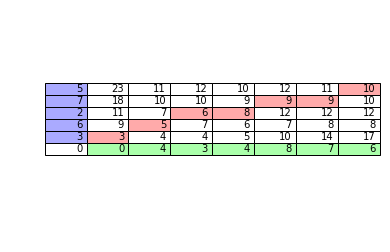

In [217]:
plt.show()

In [218]:
maxcnt = max(len(v1), len(v2))

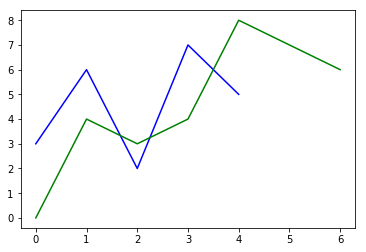

In [219]:
plt.figure()
plt.plot(np.arange(len(v1)), v1, c='blue')
plt.plot(np.arange(len(v2)), v2, c='green')
plt.show()

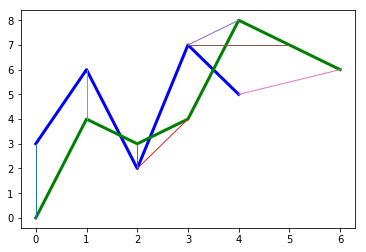

In [228]:
plt.figure()
plt.plot(np.arange(len(v1)), v1, c='blue', lw=3)
plt.plot(np.arange(len(v2)), v2, c='green', lw=3)
for pi in p:
    plt.plot( [ pi[0], pi[1] ] ,  [v1[pi[0]], v2[pi[1]] ] , lw=1 )
plt.show()

In [229]:
print('total DTW distance = ', pv[-1])

total DTW distance =  10
